 # SAR Application: Forest Disturbance
### I. How to create SAR quicklook images of forest disturbance?

* Useful Products: Polarimetric Synthetic Aperture Radar (PolSAR) time series (in HH, HV, and if possible VV), Pauli Decomposition from multiple dates, HV scatterplots, and Interferometric Synthetic Aperture Radar (InSAR) coherence from InSAR pair where the dates are pre and post disturbance.
* Useful Wavelengths: L-Band
* Relevant Sensors: UAVSAR, ALOS
* Qualitative Browse Products: Vegetation volume and coherence

### II. How to interpret SAR images of forest disturbance?

To view SAR images of forest disturbance, compare RGB images (HH, HV, VV) before and after disturbance. After disturbance, the RGB image should show an increased HH component (bare ground) and a lower vegetation component (HV), and other disturbance evidence such as gold mining and burned areas show as bare ground (purple). However, change point detection for deforestation can be difficult with just visual interpretation. In areas of large forest disturbance (e.g. deforestation), look at InSAR decorrelation from before and after. 

The overlay of different polarization channels allows users to visually classify a scene by its backscattering mechanism, such as surface scattering (strong HH and VV return), volume scattering (strong HV return) and double-bounce scattering (strong HH return). Thus in RGB images, areas dominated by green (HV) intensity are typically vegetated areas. Areas dominated by shades of pink (HH+HV) intensity are typically inundated forests, vegetated fields, or urban areas. Black and dark grey areas are usually smooth surfaces (roads, open water, smooth bare ground) where there is little radar backscatter.  

# SAR Example: Amazon Gold Mining
UAVSAR flew over Madre de Dios, Peru in 2013 and 2014. The SAR line captures a forested area and a region of gold mining in the Amazon. Line PeruMd_25602 was collected March 3, 2013 and line PeruMd_25604 was acquired May 01, 2014. The lines do not share the same coverage everywhere but have overlap.  

* UAVSAR 2013: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=PeruMd_25602_13050_001_130330_L090_CX_01#data
* UAVSAR 2014: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=PeruMd_25604_14057_001_140501_L090_CX_01#data

1. Read in each each polarization (HH, HV, and VV)
2. Plot histograms for 2014 and 2017 polarizations
3. Plot each polarization
4. Remove outliers and scale image
5. Create RGB Composite (HH, VV, HV)


Image credit: New York Times

The content of this notebook is as follows:

1. [Running the Notebook](#s1)
2. [Amazon Gold Mining](#s2)


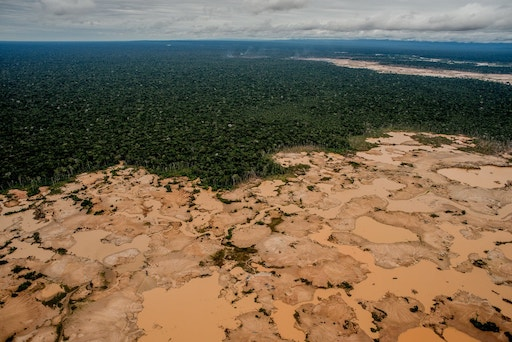

<a name="s1"></a>
## 1. Running the Notebook

- This Notebook has both "text" and "code" cells. The text cells have text descriptions about running the notebooks and data interpretation.
- Code cells are a light gray and a "play" button appears in the upper left corner when your mouse is hovered over the cell.
- To run the content in the code cells, **select the play button** in the upper left corner of each code cell or **press shift-enter**. 
- Code cells that are required for the notebook to run without errors are marked numerically with <font color='red'> Run cell below </font> 


### Python Packages:
This routine using the following python libaries. Some are already included in the Google Colab environment and others are first installed using pip in the cell below. 

In [ ]:
!pip install rasterio --quiet

import rasterio
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

### Read in Data

<a name="s2"></a>
## 2. Amazon Gold Mining

## Other Resources



## References

Mammoth Tree Die Off: https://pubs.usgs.gov/dds/dds-81/Intro/facts-sheet/fs172-96.pdf

Napa Valley: http://sodacanyonroad.org/forum.php?t=1254


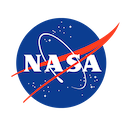

The research was carried out at the Jet Propulsion Laboratory, California Institute of Technology, under a contract with the National Aeronautics and Space Administration (80NM0018D0004)

© 2020. California Institute of Technology. Government sponsorship acknowledged. 